# Libreria

In [1]:
import pandas as pd
from pandas_profiling  import ProfileReport
import pandas_profiling
import numpy as np
from plotnine import *
theme_set(theme_linedraw()) # default theme

import sklearn
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Digraph

from sklearn import svm, datasets

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

from sklearn.svm import SVC


%matplotlib inline

# Lectura de la data

In [2]:
corazon = pd.read_csv('heart.csv')
corazon.columns = ['edad', 'sexo', 'dolorP', 'presion','colesterol','azucar', 'electro', 'maximaFc', 'angina','depresionST', 'pendienteST', 'busques', 'thal','target' ]
corazon.head()

,edad,sexo,dolorP,presion,colesterol,azucar,electro,maximaFc,angina,depresionST,pendienteST,busques,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Cambio de nombre en columnas

In [3]:
corazon.columns = ['edad', 'sexo', 'dolorP', 'presion','colesterol','azucar', 'electro', 'maximaFc', 'angina','depresionST', 'pendienteST', 'busques', 'thal','target' ]

In [4]:
corazon

,edad,sexo,dolorP,presion,colesterol,azucar,electro,maximaFc,angina,depresionST,pendienteST,busques,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#Eliminar nan o valores predidos
corazon.dropna()
corazon

,edad,sexo,dolorP,presion,colesterol,azucar,electro,maximaFc,angina,depresionST,pendienteST,busques,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#Elimina los duplicados
corazon = corazon.drop_duplicates()
#Luego la data se separa para lograr mantener el orden de los indices
target = pd.DataFrame(corazon['target'])
corazon = corazon.drop(['target'], axis=1)

# Analicis de la data

## Profiling

In [7]:
profile = corazon.profile_report()

In [8]:
profile


## Factorizacion

In [9]:
chi_square_value, p_value = calculate_bartlett_sphericity(corazon)
chi_square_value, p_value

(562.4278578491244, 8.20713233355246e-75)

In [10]:
kmo_all, kmo_model = calculate_kmo(corazon)
kmo_model

0.666246137902862

In [11]:
fa = FactorAnalyzer()
fa.analyze(corazon, 12, rotation = None)
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.770752
1,1.541732
2,1.216776
3,1.185743
4,1.023144
5,0.969278
6,0.865050
7,0.779523
8,0.706230
9,0.622433


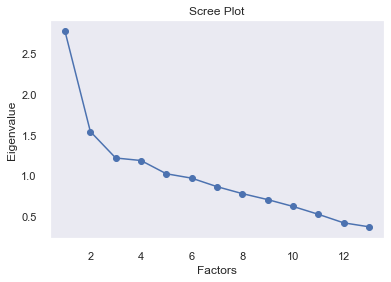

In [12]:
plt.scatter(range(1,corazon.shape[1]+1),ev)
plt.plot(range(1,corazon.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [13]:
QAfa = FactorAnalyzer()
fa.analyze(corazon, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
edad,-0.449013,-0.130724,0.581447,0.057528,0.036866
sexo,0.031976,0.883655,0.034589,0.020434,0.164400
dolorP,0.162880,0.049549,0.071143,-0.029580,-0.661879
presion,0.002925,-0.070181,0.442827,0.150144,-0.036453
colesterol,0.070047,-0.266707,0.319167,-0.040655,0.179020
azucar,-0.033535,0.074445,0.274661,0.019347,-0.106789
electro,-0.016318,-0.011716,-0.234774,-0.038758,-0.077949
maximaFc,0.747634,-0.016112,-0.048503,-0.308932,-0.282759
angina,-0.173350,0.064247,0.030593,0.239996,0.515411
depresionST,-0.079084,0.054664,0.215156,0.707517,0.215102


# Separacion de la data en entrenamiento y test

In [14]:
# Se lee nueamente la data para no perder los indices en la separacion
corazon = pd.read_csv('heart.csv')
corazon.columns = ['edad', 'sexo', 'dolorP', 'presion','colesterol','azucar', 'electro', 'maximaFc', 'angina','depresionST', 'pendienteST', 'busques', 'thal','target' ]
#Elimina los duplicados
corazon = corazon.drop_duplicates()
corazon.head()

,edad,sexo,dolorP,presion,colesterol,azucar,electro,maximaFc,angina,depresionST,pendienteST,busques,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Se separa la data en evaluacion y entrenamiento
entrenamiento, evaluacion= train_test_split(corazon, test_size = 0.30)

In [16]:
# Se separa la data en objetivo y , y data como tal
entrenamiento_y = pd.DataFrame(entrenamiento['target'])
entrenamiento_x = entrenamiento.drop(['target'], axis=1)

evaluacion_y = pd.DataFrame(evaluacion['target'])
evaluacion_x = evaluacion.drop(['target'], axis=1)

In [17]:
lista = []
for i in evaluacion_y['target']:
    lista.append(int(i))
    
y_evaluacion = np.array(lista)

lista = []
for i in entrenamiento_y['target']:
    lista.append(int(i))
    
y_entrenamiento = np.array(lista)

# K-means

In [18]:
#lista con los 24 colores a usar
colors = [     'chartreuse', 'green',      'mediumspringgreen', 'lightseagreen',
          'darkcyan']

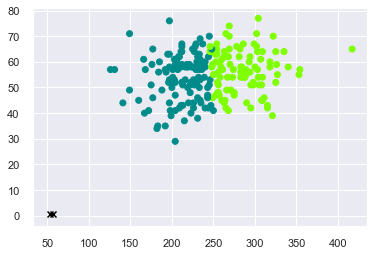

In [19]:
kmeans = cluster.KMeans(2)
kmeans.fit(entrenamiento_x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(entrenamiento_x['colesterol'], entrenamiento_x['edad'], c=labels,cmap=ListedColormap(colors))
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

In [20]:
lista_entrenamiento_y = []
for i in entrenamiento_y.target:
    lista_entrenamiento_y.append(i)

In [21]:
lista_knn2 = []
for i in kmeans.labels_:
    lista_knn2.append(i)

In [22]:
print( lista_knn2)
print(lista_entrenamiento_y)

[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,

In [23]:
aux = 0
for i in range(len(lista_entrenamiento_y)):
    if lista_knn2[i] == lista_entrenamiento_y[i]:
        aux = aux +1
print (aux)
print(len(lista_entrenamiento_y))

119
211


In [24]:
lista_entrenamientoy2 = []
for i in lista_entrenamiento_y:
    if int(i) == 0:
        lista_entrenamientoy2.append(1)
    if int(i) == 1:
        lista_entrenamientoy2.append(0)
len(lista_entrenamientoy2)
lista_entrenamientoy2 = np.array(lista_entrenamientoy2)

Cantidad de errores de clasificación sobre un total de 211 casos: 119
Efectividad del algoritmo:  0.44


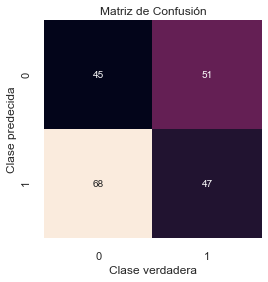

In [25]:
# Matriz de confusión con diferente entrenamiento
y_pred= lista_knn2
cnf_matrix = confusion_matrix(lista_entrenamientoy2, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(lista_entrenamientoy2.shape[0],(lista_entrenamientoy2 != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (lista_entrenamientoy2 != y_pred).sum()/lista_entrenamientoy2.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

Cantidad de errores de clasificación sobre un total de 211 casos: 92
Efectividad del algoritmo:  0.56


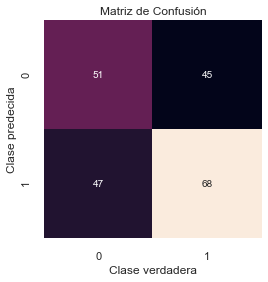

In [26]:
# Matriz de confusión normal
y_pred= lista_knn2
cnf_matrix = confusion_matrix(y_entrenamiento, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_entrenamiento.shape[0],(y_entrenamiento != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_entrenamiento != y_pred).sum()/y_entrenamiento.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# Agrupacion jerarquica

In [27]:
data = corazon.sample(15)
target_data = pd.DataFrame(data['target'])
data_x = data.drop(['target'], axis=1)

In [28]:
distancias = linkage(data_x.values, 'complete', metric='euclidean')
etiquetas = data_x.edad.values

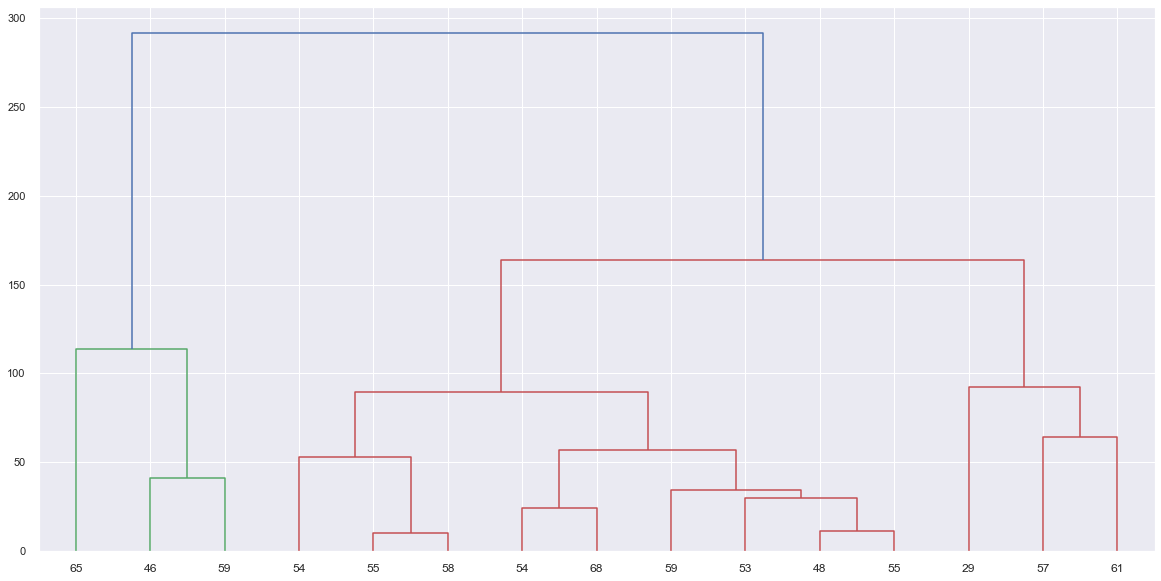

In [29]:
plt.figure(figsize=(20, 10))
dendrogram(distancias, orientation='top',labels = etiquetas, distance_sort='descending',show_leaf_counts=True)
plt.show()  

# Arboles de decision

In [30]:
ad = DecisionTreeClassifier( max_depth=10) # Creando el modelo
ad.fit(entrenamiento_x, lista_entrenamiento_y) # Ajustando el modelo

#generando archivo para graficar el arbol
with open("mi_arbol.dot", 'w') as archivo_dot: tree.export_graphviz(ad, out_file = archivo_dot)

In [31]:
from graphviz import Digraph
# utilizando el lenguaje dot para graficar el arbol.
!dot -Tjpeg mi_arbol.dot -o arbol_decision1.jpeg

In [32]:
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((lista_entrenamiento_y == ad.predict(entrenamiento_x)).mean()))

precisión del modelo:  1.00


Cantidad de errores de clasificación sobre un total de 91 casos: 20
Efectividad del algoritmo:  0.78


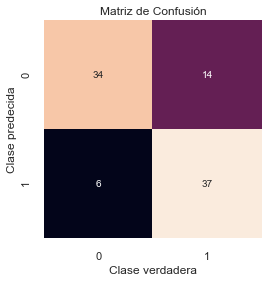

In [33]:
# Matriz de confusión
y_pred= ad.predict(evaluacion_x)
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# Random Forest

In [34]:
rf = RandomForestClassifier() # Creando el modelo
rf.fit(entrenamiento_x, entrenamiento_y) # Ajustando el modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((y_entrenamiento == rf.predict(entrenamiento_x)).mean()))

precisión del modelo:  1.00


In [36]:
# verificando la precisión test
print("precisión del modelo: {0: .2f}".format((y_evaluacion == rf.predict(evaluacion_x)).mean()))

precisión del modelo:  0.90


In [37]:
# verificando la precisión test
print("precisión del modelo: {0: .2f}".format((y_evaluacion == ad.predict(evaluacion_x)).mean()))

precisión del modelo:  0.78


Cantidad de errores de clasificación sobre un total de 91 casos: 9
Efectividad del algoritmo:  0.90


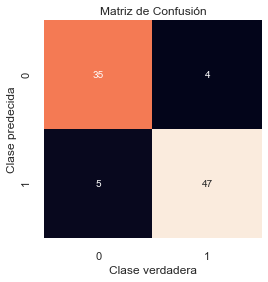

In [38]:
# Matriz de confusión
y_pred= rf.predict(evaluacion_x)
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

In [39]:
# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(entrenamiento_x, y_entrenamiento)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(entrenamiento_x, y_entrenamiento), tree.score(evaluacion_x, y_evaluacion)))

Precisión modelo inicial train/test  0.844/0.824


In [40]:
caracterictica = ['edad', 'sexo', 'dolorP', 'presion','colesterol','azucar', 'electro', 'maximaFc', 'angina','depresionST', 'pendienteST', 'busques', 'thal']

In [41]:
import graphviz
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=["no presenta enfermedad", "presenta enfermedad"], 
                feature_names=caracterictica, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# utilizando el lenguaje dot para graficar el arbol.
!dot -Tjpeg tree.dot -o random.jpeg

In [42]:
from sklearn.ensemble import AdaBoostClassifier
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(entrenamiento_x, y_entrenamiento)

In [43]:
ada.score(evaluacion_x, y_evaluacion)

0.8241758241758241

In [44]:
ada.score(entrenamiento_x, y_entrenamiento)

1.0

In [45]:
ada.feature_importances_

array([0.16069777, 0.01815601, 0.05221659, 0.13327395, 0.20057011,
       0.00744419, 0.02253233, 0.15042802, 0.01980465, 0.10874107,
       0.02863513, 0.06896311, 0.02853707])

In [46]:
imp = pd.DataFrame(zip(caracterictica, ada.feature_importances_), columns = ['Caracteristica', 'Importancia'])
imp = imp.sort_values(by = 'Importancia', ascending = False)
imp.head()

,Caracteristica,Importancia
4,colesterol,0.200570
0,edad,0.160698
7,maximaFc,0.150428
3,presion,0.133274
9,depresionST,0.108741


Cantidad de errores de clasificación sobre un total de 91 casos: 16
Efectividad del algoritmo:  0.82


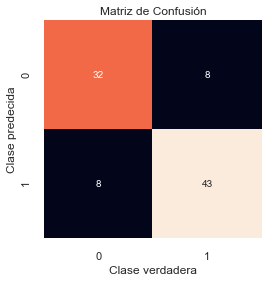

In [47]:
# Matriz de confusión
y_pred= ada.predict(evaluacion_x)
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# Bayesianas

In [48]:
# inicializar el clasificador Naive Bayes
bayes_ingenuo = GaussianNB()

# predicción 
y_pred = bayes_ingenuo.fit(entrenamiento_x, y_entrenamiento).predict(evaluacion_x)

Cantidad de errores de clasificación sobre un total de 91 casos: 14
Efectividad del algoritmo:  0.85


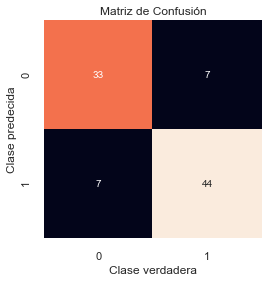

In [49]:
# Matriz de confusión
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# SVM LINEAL

In [50]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(entrenamiento_x, y_entrenamiento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Cantidad de errores de clasificación sobre un total de 91 casos: 12
Efectividad del algoritmo:  0.87


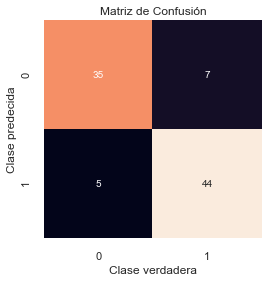

In [51]:
y_pred = svclassifier.predict(evaluacion_x)

# Matriz de confusión
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# SVM POLYNOMIAL

In [52]:
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(entrenamiento_x, y_entrenamiento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Cantidad de errores de clasificación sobre un total de 91 casos: 29
Efectividad del algoritmo:  0.68


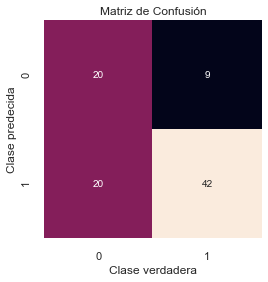

In [53]:
y_pred = svclassifier.predict(evaluacion_x)

# Matriz de confusión
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# Kernel Gaussian

In [54]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(entrenamiento_x, y_entrenamiento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Cantidad de errores de clasificación sobre un total de 91 casos: 29
Efectividad del algoritmo:  0.68


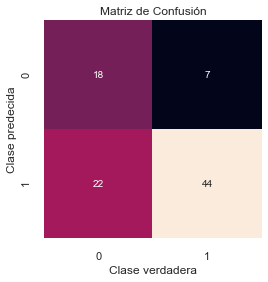

In [55]:
y_pred = svclassifier.predict(evaluacion_x)

# Matriz de confusión
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

# Sigmoid Kernel

In [56]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(entrenamiento_x, y_entrenamiento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Cantidad de errores de clasificación sobre un total de 91 casos: 40
Efectividad del algoritmo:  0.56


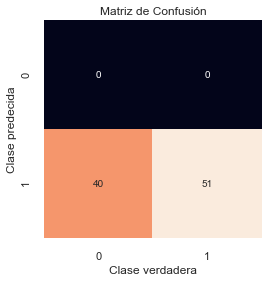

In [57]:
y_pred = svclassifier.predict(evaluacion_x)

# Matriz de confusión
cnf_matrix = confusion_matrix(y_evaluacion, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_evaluacion.shape[0],(y_evaluacion != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_evaluacion != y_pred).sum()/y_evaluacion.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()